In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import math
from matplotlib.mlab import PCA as mlabPCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 
from sklearn import neighbors
from sklearn import linear_model
df = pd.read_csv('QBStats_2016.csv')

In [20]:
df.head()

,qb,att,cmp,yds,ypa,td,int,lg,sack,loss,rate,game_points,home_away,year
0,Jameis WinstonJ. Winston,32,23,281,8.8,4,1,45t,0,0,125.1,31,away,2016
1,Matt RyanM. Ryan,39,27,334,8.6,2,0,59,3,12,112.6,24,home,2016
2,Shaun HillS. Hill,33,18,236,7.2,0,0,33,0,0,77.3,25,away,2016
3,Marcus MariotaM. Mariota,41,25,271,6.6,2,1,29,2,19,86.5,16,home,2016
4,Robert Griffin IIIR. Griffin,26,12,190,7.3,0,1,58,3,22,55.0,10,away,2016


                  att       cmp       yds        td      rate  game_points
att          1.000000  0.949906  0.868700  0.422844  0.171162    -0.067486
cmp          0.949906  1.000000  0.909080  0.500526  0.346722     0.042084
yds          0.868700  0.909080  1.000000  0.596625  0.462051     0.183427
td           0.422844  0.500526  0.596625  1.000000  0.646502     0.475269
rate         0.171162  0.346722  0.462051  0.646502  1.000000     0.510915
game_points -0.067486  0.042084  0.183427  0.475269  0.510915     1.000000


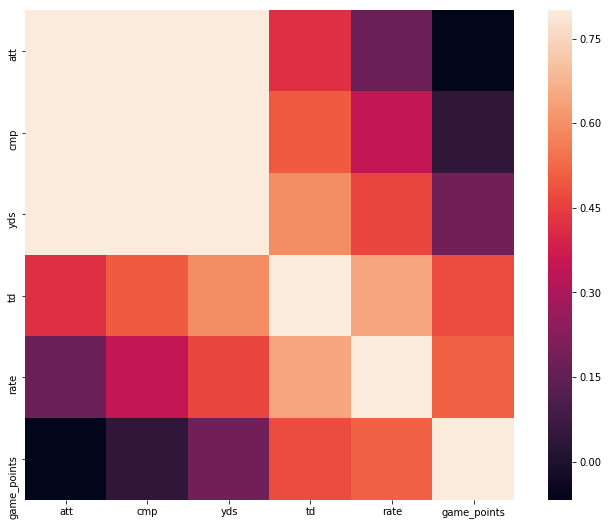

In [21]:
df_stat = df[['att','cmp','yds', 'td', 'rate' ,'game_points']]

corrmat = df_stat.corr()

print(corrmat)

f, ax = plt.subplots(figsize=(12, 9))


sns.heatmap(corrmat, vmax=.8 ,square=True)
plt.show()

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


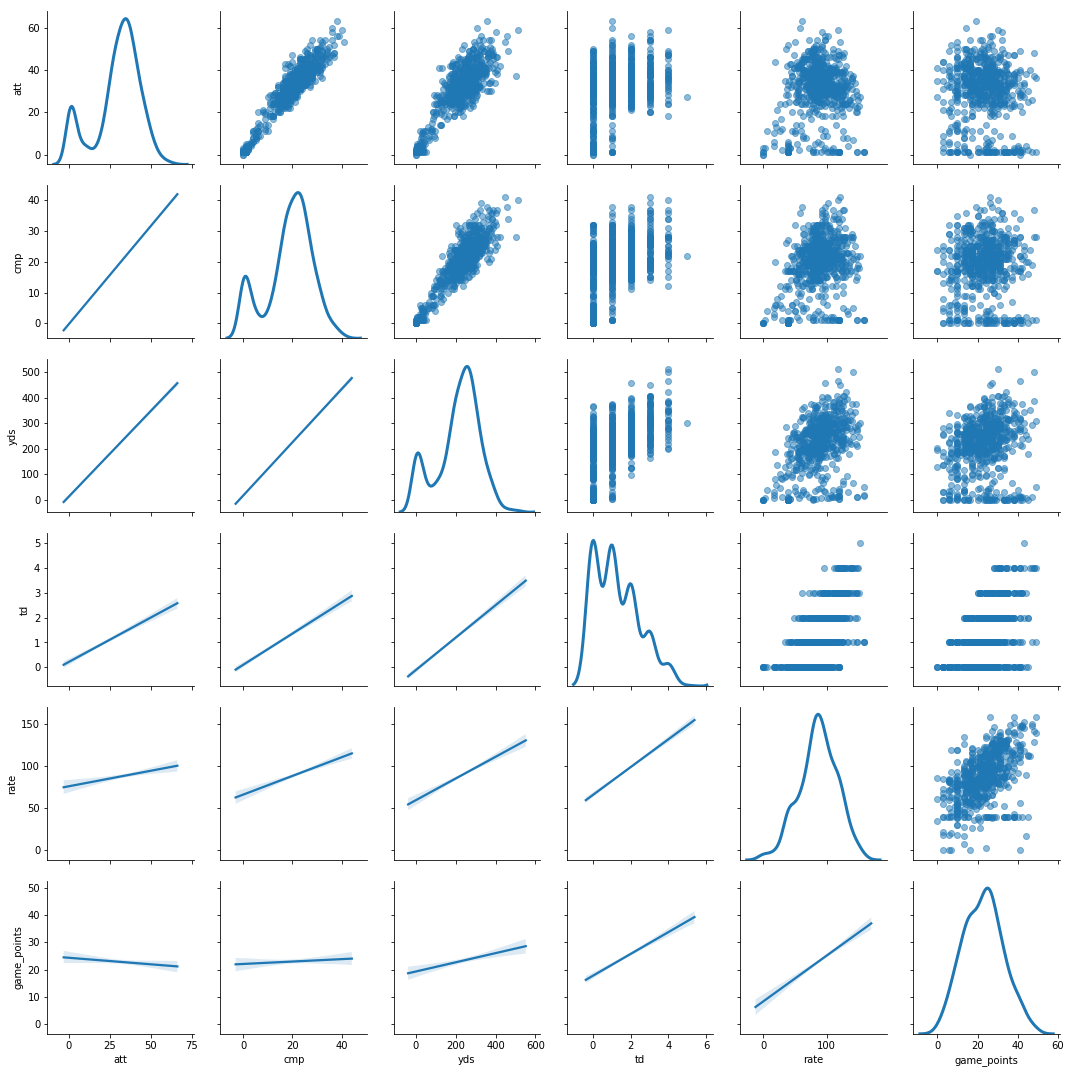

In [22]:
g = sns.PairGrid(df_stat.dropna(), diag_sharey=False)
# Scatterplot.
g.map_upper(plt.scatter, alpha=.5)
# Fit line summarizing the linear relationship of the two variables.
g.map_lower(sns.regplot, scatter_kws=dict(alpha=0))
# Give information about the univariate distributions of the variables.
g.map_diag(sns.kdeplot, lw=3)
plt.show()

C:\Users\ihemb\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  after removing the cwd from sys.path.
C:\Users\ihemb\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """


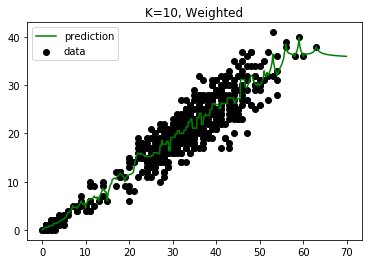

In [23]:
knn_w = neighbors.KNeighborsRegressor(n_neighbors=10, weights='distance')
X = df['att']
Y = df['cmp']
X=X.reshape(-1, 1)
Y=Y.reshape(-1, 1)
knn_w.fit(X, Y)

# Set up our prediction line.
T = np.arange(0, 70, 0.1)[:, np.newaxis]

Y_ = knn_w.predict(T)

plt.scatter(X, Y, c='k', label='data')
plt.plot(T, Y_, c='g', label='prediction')
plt.legend()
plt.title('K=10, Weighted')
plt.show()

In [24]:
from sklearn.model_selection import cross_val_score
score_w = cross_val_score(knn_w, X, Y, cv=5)
print("Weighted Accuracy: %0.2f (+/- %0.2f)" % (score_w.mean(), score_w.std() * 2))

Weighted Accuracy: 0.88 (+/- 0.06)


In [27]:
regr = linear_model.LinearRegression()
regr.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))


Coefficients: 
 [[0.63860254]]

Intercept: 
 [-0.25500973]

R-squared:
0.9023206849026116


In [28]:
score_w = cross_val_score(regr, X, Y, cv=5)
print("Weighted Accuracy: %0.2f (+/- %0.2f)" % (score_w.mean(), score_w.std() * 2))

Weighted Accuracy: 0.90 (+/- 0.04)
